In [26]:
import xarray as xr
from smmregrid import Regridder, cdo_generate_weights

In [27]:
# Load the data
data = xr.open_dataset("tests/data/so3d-nemo.nc")

In [28]:
data

<xarray.Dataset> Size: 24MB
Dimensions:         (time: 2, bnds: 2, j: 292, i: 362, vertices: 4, lev: 18)
Coordinates:
  * time            (time) datetime64[ns] 16B 2010-01-16T12:00:00 2010-02-15
    longitude       (j, i) float64 846kB ...
    latitude        (j, i) float64 846kB ...
  * i               (i) float64 3kB 1.0 2.0 3.0 4.0 ... 359.0 360.0 361.0 362.0
  * j               (j) float64 2kB 1.0 2.0 3.0 4.0 ... 289.0 290.0 291.0 292.0
  * lev             (lev) float64 144B 0.5058 2.668 ... 4.888e+03 5.698e+03
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) datetime64[ns] 32B ...
    longitude_bnds  (j, i, vertices) float64 3MB ...
    latitude_bnds   (j, i, vertices) float64 3MB ...
    lev_bnds        (lev, bnds) float64 288B ...
    so              (time, lev, j, i) float32 15MB ...
Attributes: (12/50)
    CDI:                                Climate Data Interface version 2.0.4 ...
    source:                             EC-Earth3 (2019): \naerosol: none\nat...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    ...                                 ...
    tracking_id:                        hdl:21.14100/24a0c5fe-f273-4e00-9005-...
    branch_time_in_child:               0.0D
    branch_time_in_parent:              149749.0D
    history:                            Fri May 05 10:51:35 2023: cdo -f nc4 ...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 2.0.4 ...

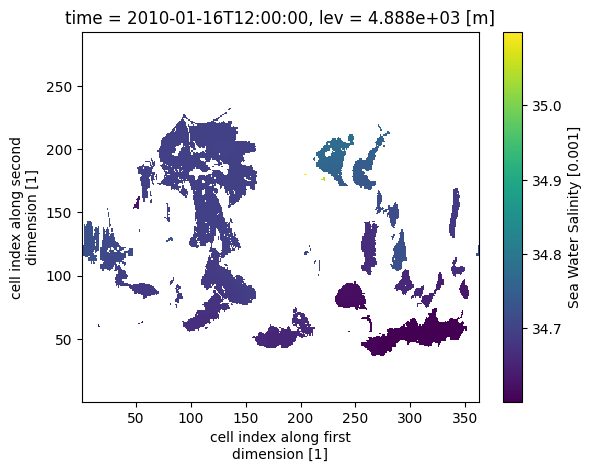

In [31]:
data.so.isel(lev=16, time=0).plot()

In [32]:
regridder = Regridder(source_grid=data, target_grid="r180x90", method="ycon")

In [33]:
datar = regridder.regrid(data)

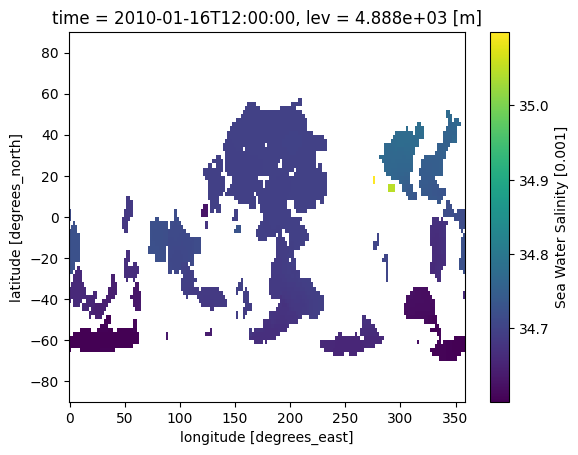

In [34]:
datar.so.isel(lev=[16],time=0).plot()

In [39]:
datar2 = regridder.regrid(data.isel(lev=[16]))

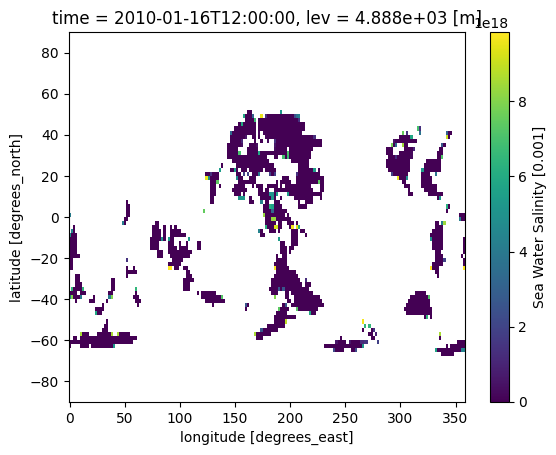

In [43]:
datar2.isel(time=0).so.plot()

In [37]:
datar3 = regridder.regrid(data.isel(lev=[16,17], time=0))

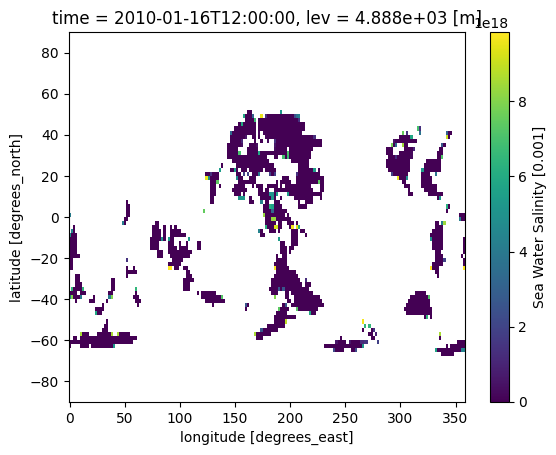

In [38]:
datar3.so.isel(lev=0).plot()